**8.1** Least squares: The folder ElectionsEconomy contains the data for the example in Section 7.1.
Load these data, type in the **R** function **rss()** from page 104, and evaluate it at several different
values of (*a*, *b*). Make two graphs: a plot of the sum of squares of residuals as a function of *a*,
with *b* fixed at its least squares estimate given in Section 7.1, and a plot of the sum of squares of
residuals as a function of *b*, with *a* fixed at its least squares estimate. Confirm that the residual
sum of squares is indeed minimized at the least squares estimate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize

In [2]:
hibbs = pd.read_csv('hibbs.dat', sep=' ')
x, y = hibbs['growth'].values, hibbs['vote'].values

In [3]:
def resid(theta, x, y):
    return y - (theta[0] + theta[1]*x)

In [4]:
ols = scipy.optimize.least_squares(resid, np.array([1, 1]), args=(x, y), bounds=([0, 0], [np.inf, np.inf]))

In [5]:
# Compute residual sum of squares from optimal params
rss_ols = np.sum(resid(ols.x, x, y)**2)

# Compute OLS for sigma
sigma_ols = np.sqrt(rss_ols / (len(y)))

# Take a look
ols.x, sigma_ols

(array([46.24764806,  3.06052803]), 3.520233251276052)

In [6]:
def rss(x, y, a, b):
    resid = y - (a + b*x)
    return np.sum(resid**2)

In [7]:
A = np.linspace(20, 80, 1000) # 1, 101,
B = np.linspace(-10, 10, 1000) # -30, 30,
rssa = [rss(hibbs['growth'].values, hibbs['vote'].values, a, 3.03) for a in A]
rssb = [rss(hibbs['growth'].values, hibbs['vote'].values, 46.28, b) for b in B]

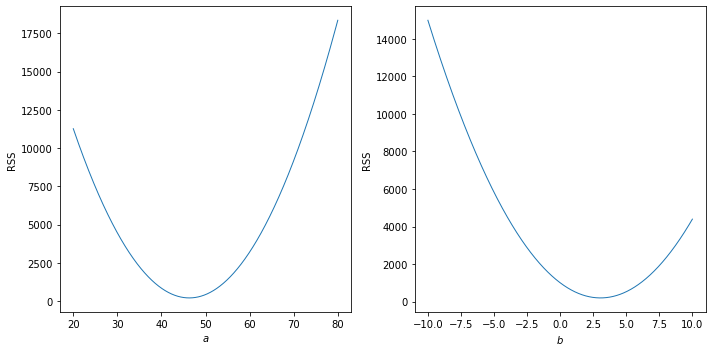

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(A, rssa, lw = 1)
axes[0].set_xlabel('$a$')
axes[0].set_ylabel('RSS')
axes[1].plot(B, rssb, lw = 1)
axes[1].set_xlabel('$b$')
axes[1].set_ylabel('RSS')
fig.tight_layout()

In [9]:
A[np.argmin(rssa)], B[np.argmin(rssb)]

(46.30630630630631, 3.0530530530530537)

**8.2** Maximum likelihood: Repeat the previous exercise but this time write a function, similar to
**rss()** on page 104, that computes the logarithm of the likelihood (8.6) as a function of the data
and the parameters $a$, $b$, $\sigma$. Evaluate this function as several values of these parameters, and
make a plot demonstrating that it is maximized at the values computed from the formulas in the
text (with $\sigma$ computed using $\frac{1}{n}$, not $\frac{1}{n−2}$ ; see page 104).

In [10]:
import numdifftools as ndt

In [11]:
def neg_loglike(theta, x, y):
    mu = theta[0] + theta[1] * x
    return -1 * st.norm(mu, theta[2]).logpdf(y).sum()

In [12]:
theta_start = np.array([1, 1, 1])
mle = scipy.optimize.minimize(neg_loglike, theta_start, args=(x, y), method = 'Nelder-Mead')

In [13]:
Hfun = ndt.Hessian(neg_loglike, full_output = True)
hessian_ndt, info = Hfun(mle['x'], x, y)
se = np.sqrt(np.diag(np.linalg.inv(hessian_ndt)))
results = pd.DataFrame({'Mean': mle['x'],'st': se}, index = ['Intercept','Slope','Sigma'])
print(results)

                Mean        st
Intercept  46.247675  1.517177
Slope       3.060525  0.651304
Sigma       3.520231  0.622294


**8.3** Least absolute deviation: Repeat 8.1, but instead of calculating and minimizing the sum of
squares of residuals, do this for the sum of absolute values of residuals. Find the ($a$, $b$) that
minimizes the sum of absolute values of residuals, and plot the sum of absolute values of residuals
as a function of $a$ and of $b$. Compare the least squares and least absolute deviation estimates of
($a$, $b$).

In [14]:
lad = scipy.optimize.least_squares(resid, np.array([1, 1]), loss = 'soft_l1', args=(x, y))

In [15]:
lad.x

array([45.97494969,  3.49747639])